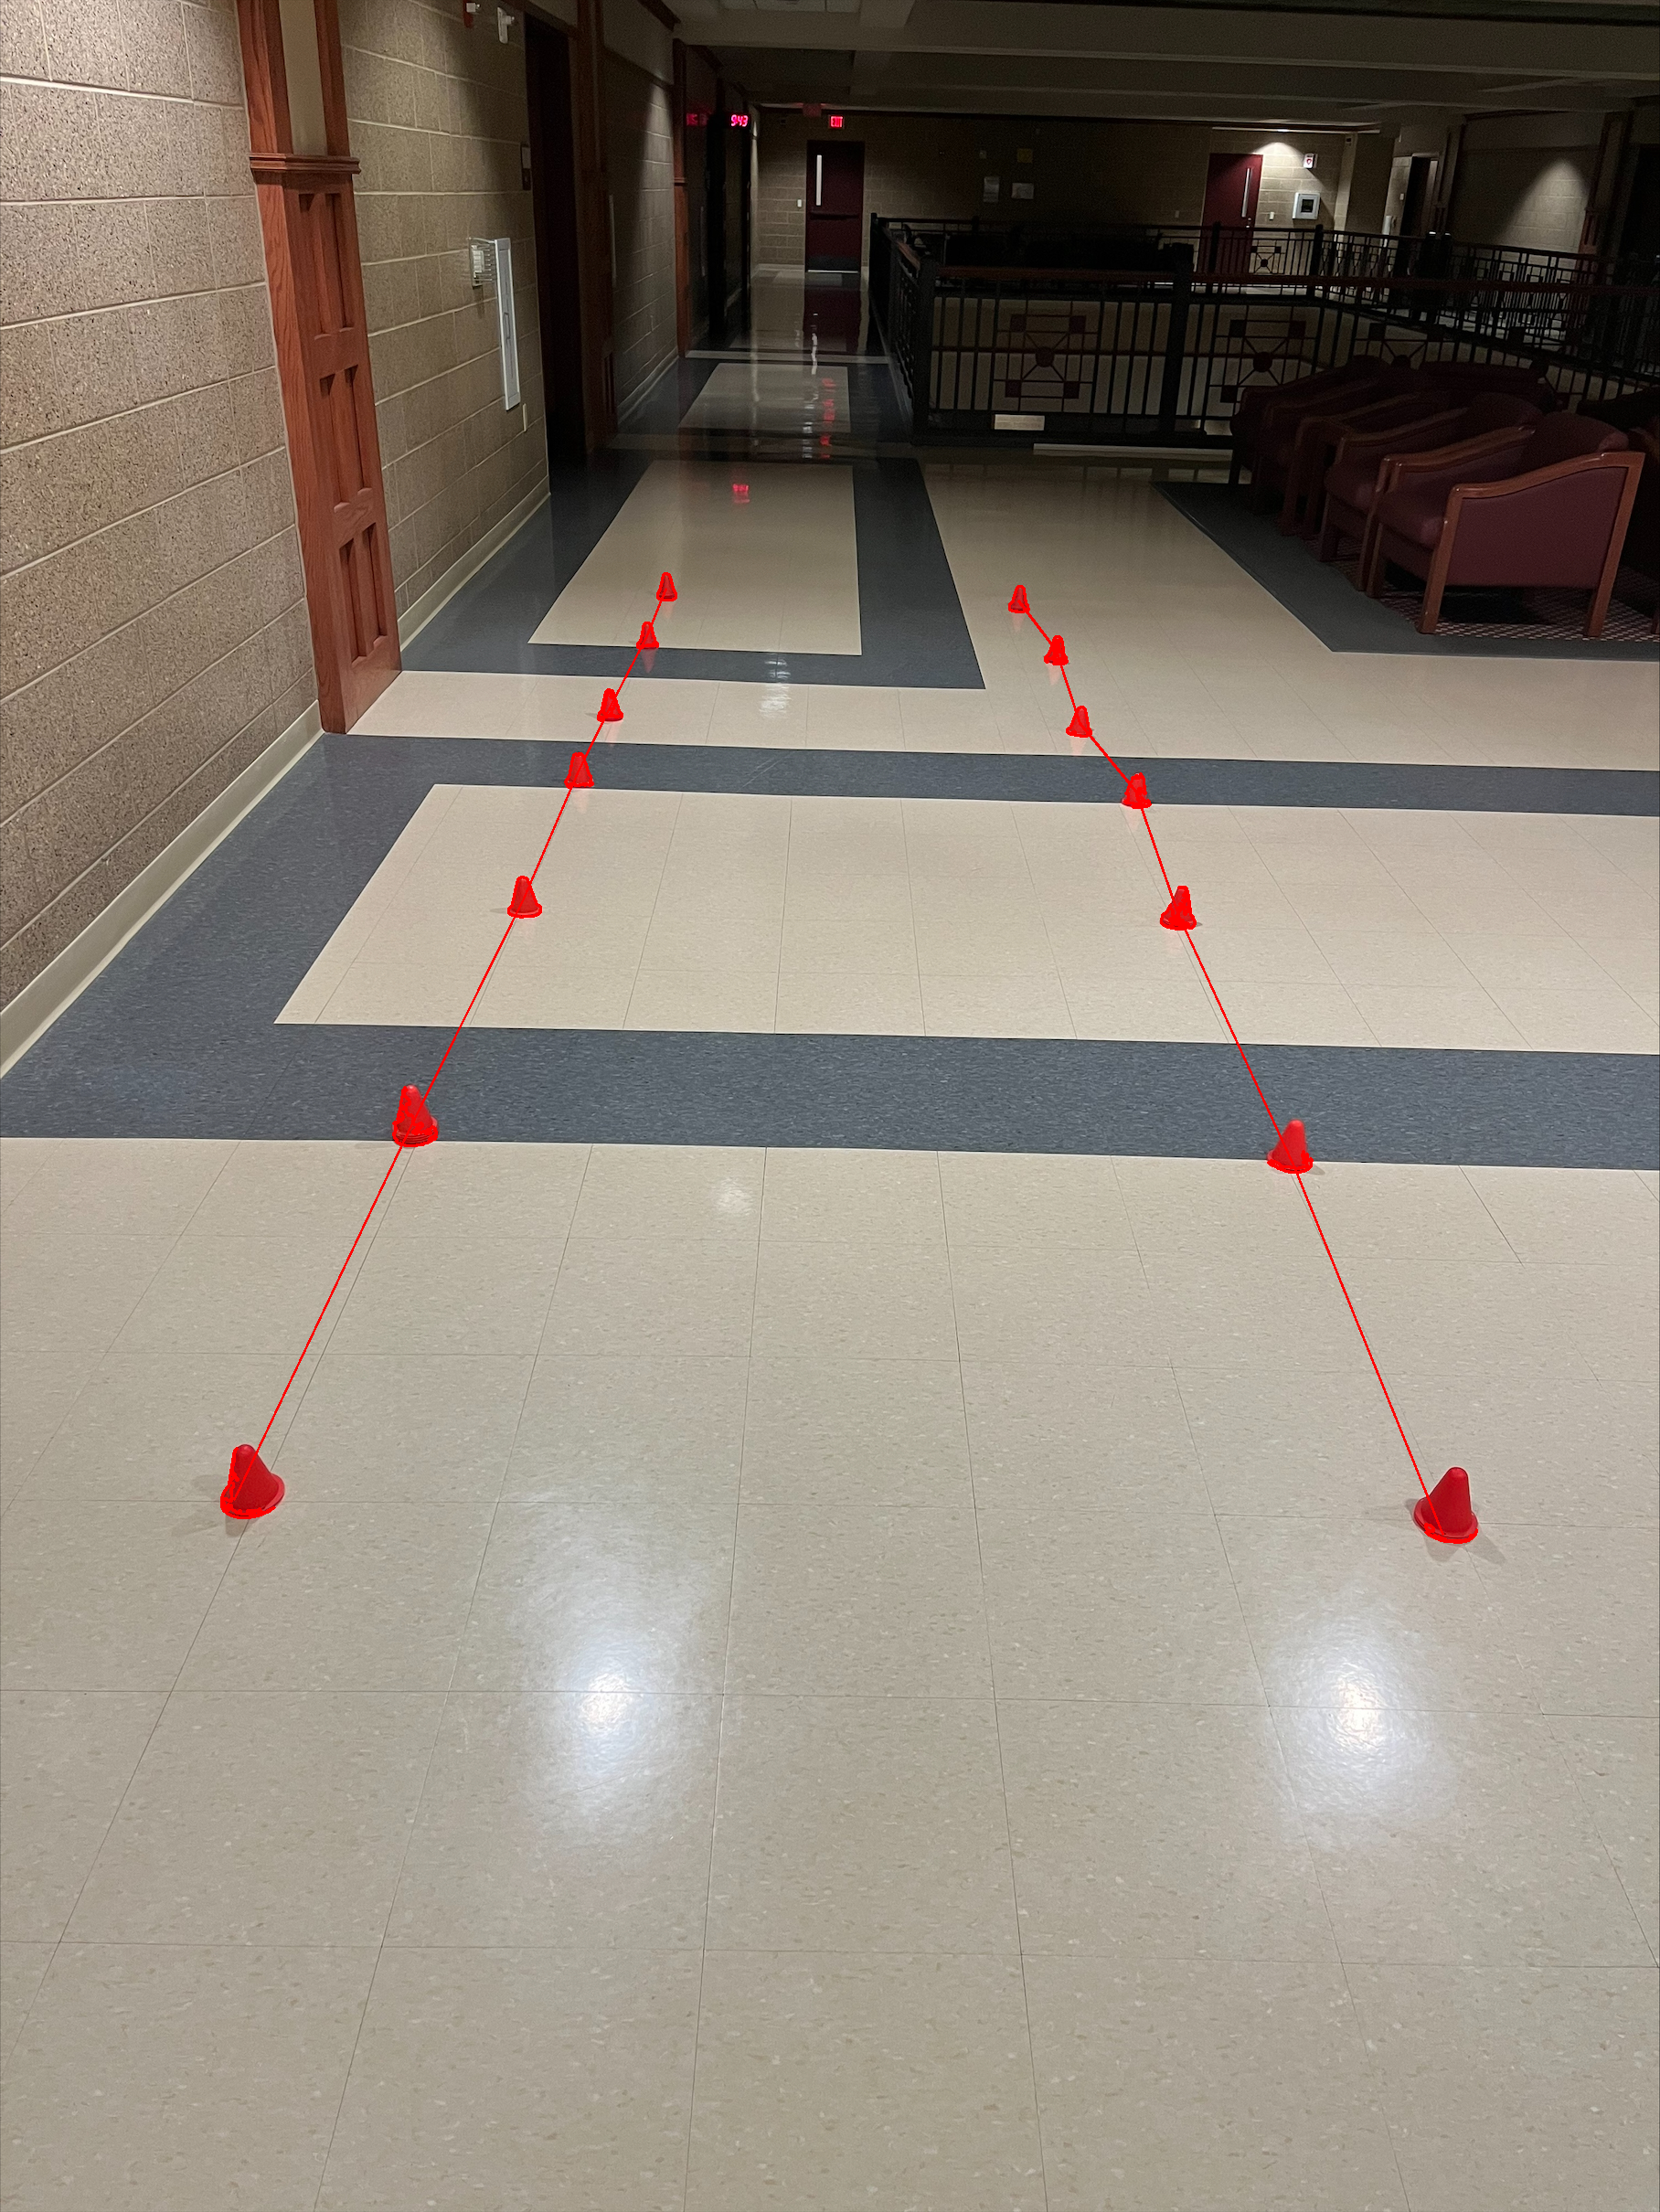

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Define the image path
image_path = '/content/red.png'

try:
    # Load the input image
    input_image = cv2.imread(image_path)
    if input_image is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")
except Exception as e:
    print(f"Error: {e}")
    input_image = None

if input_image is not None:
    # Splitting the image in half
    height, width, _ = input_image.shape
    left_half = input_image[:, :width // 2].copy()
    right_half = input_image[:, width // 2:].copy()

    def find_cones_and_draw_lines(image):
        # Convert the image to HSV color space
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        # Define the lower and upper bounds for cone color (red-orange)
        lower_red = np.array([0, 100, 100])
        upper_red = np.array([10, 255, 255])

        # Create a mask to detect cones in the specified color range
        mask = cv2.inRange(hsv_image, lower_red, upper_red)

        # Find contours of detected cones
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Get the upper fourth of the image height
        upper_fourth = height // 4

        centroids = []

        # Iterate through detected contours
        for contour in contours:
            if cv2.contourArea(contour) > 100:
                # Calculate the centroid of the contour
                M = cv2.moments(contour)
                if M["m00"] != 0:
                    cX = int(M["m10"] / M["m00"])
                    cY = int(M["m01"] / M["m00"])
                    if cY > upper_fourth:
                        centroids.append((cX, cY))
                        cv2.drawContours(image, [contour], -1, (0, 0, 255), 2)  # Change line color to red

        # Draw lines connecting centroids
        for i in range(len(centroids) - 1):
            cv2.line(image, centroids[i], centroids[i + 1], (0, 0, 255), 2)  # Change line color to red

    # Apply the function to each half of the image
    find_cones_and_draw_lines(left_half)
    find_cones_and_draw_lines(right_half)

    # Merge the two halves to create the final output image
    merged_image = np.hstack((left_half, right_half))

    # Show the merged image
    cv2_imshow(merged_image)

    # Save the merged image as a PNG
    output_image_path = '/content/answer_image.png'
    cv2.imwrite(output_image_path, merged_image)

# Wait for a key press and close windows
cv2.waitKey(0)
cv2.destroyAllWindows()
